# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 12.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

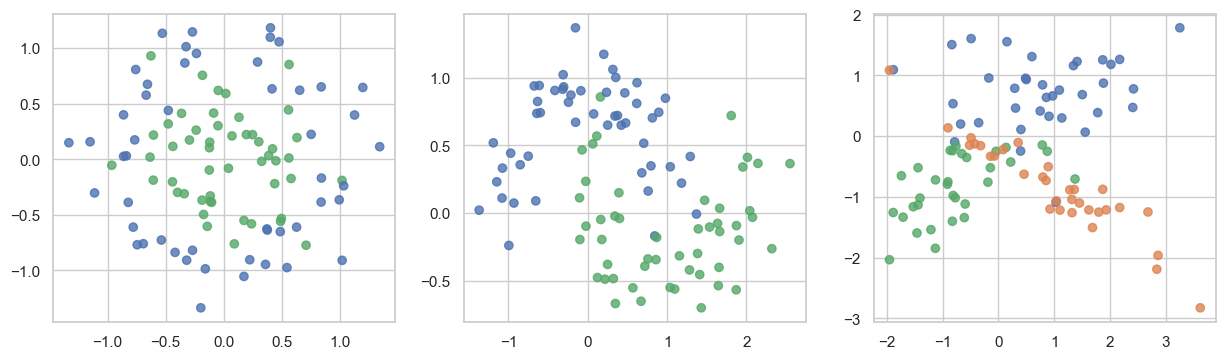

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

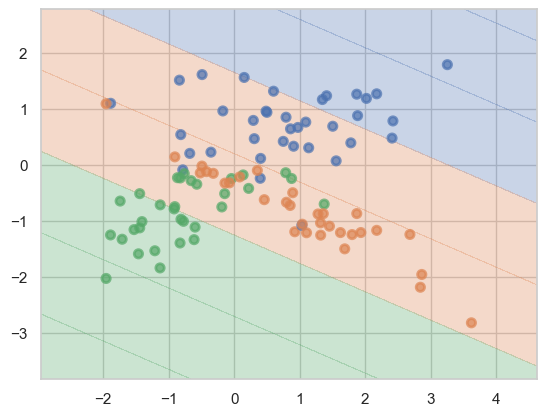

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Model circles:


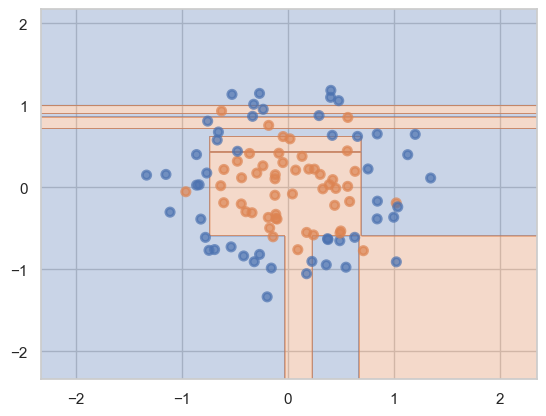

accuracy_train = 1.0
accuracy_test = 0.7272727272727273
Model moons:


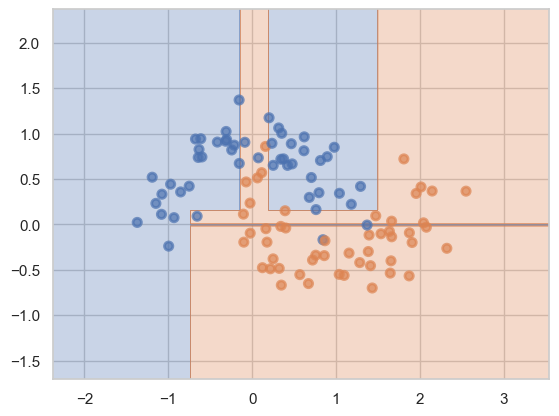

accuracy_train = 1.0
accuracy_test = 0.8787878787878788
Model classification:


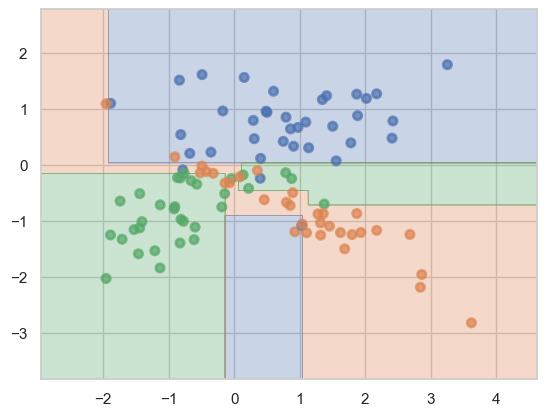

accuracy_train = 1.0
accuracy_test = 0.8181818181818182


In [7]:
model_names = ['circles', 'moons', 'classification']

for i, (X, y) in enumerate(datasets):
    print(f'Model {model_names[i]}:')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    plot_surface(clf, X, y)
    plt.show()
    test_pred = clf.predict(X_test)
    train_pred = clf.predict(X_train)
    
    print(f'accuracy_train = {accuracy_score(y_train, train_pred)}')
    print(f'accuracy_test = {accuracy_score(y_test, test_pred)}')
        

__Ответ:__ деревья переобучились, но нельзя сказать что они переобучились слишком сильно, так как на тесте точность больше 0.8 (что достаточно неплохо, однако стоит учитывать небольшой размер каждой из выборок)

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Model circles:


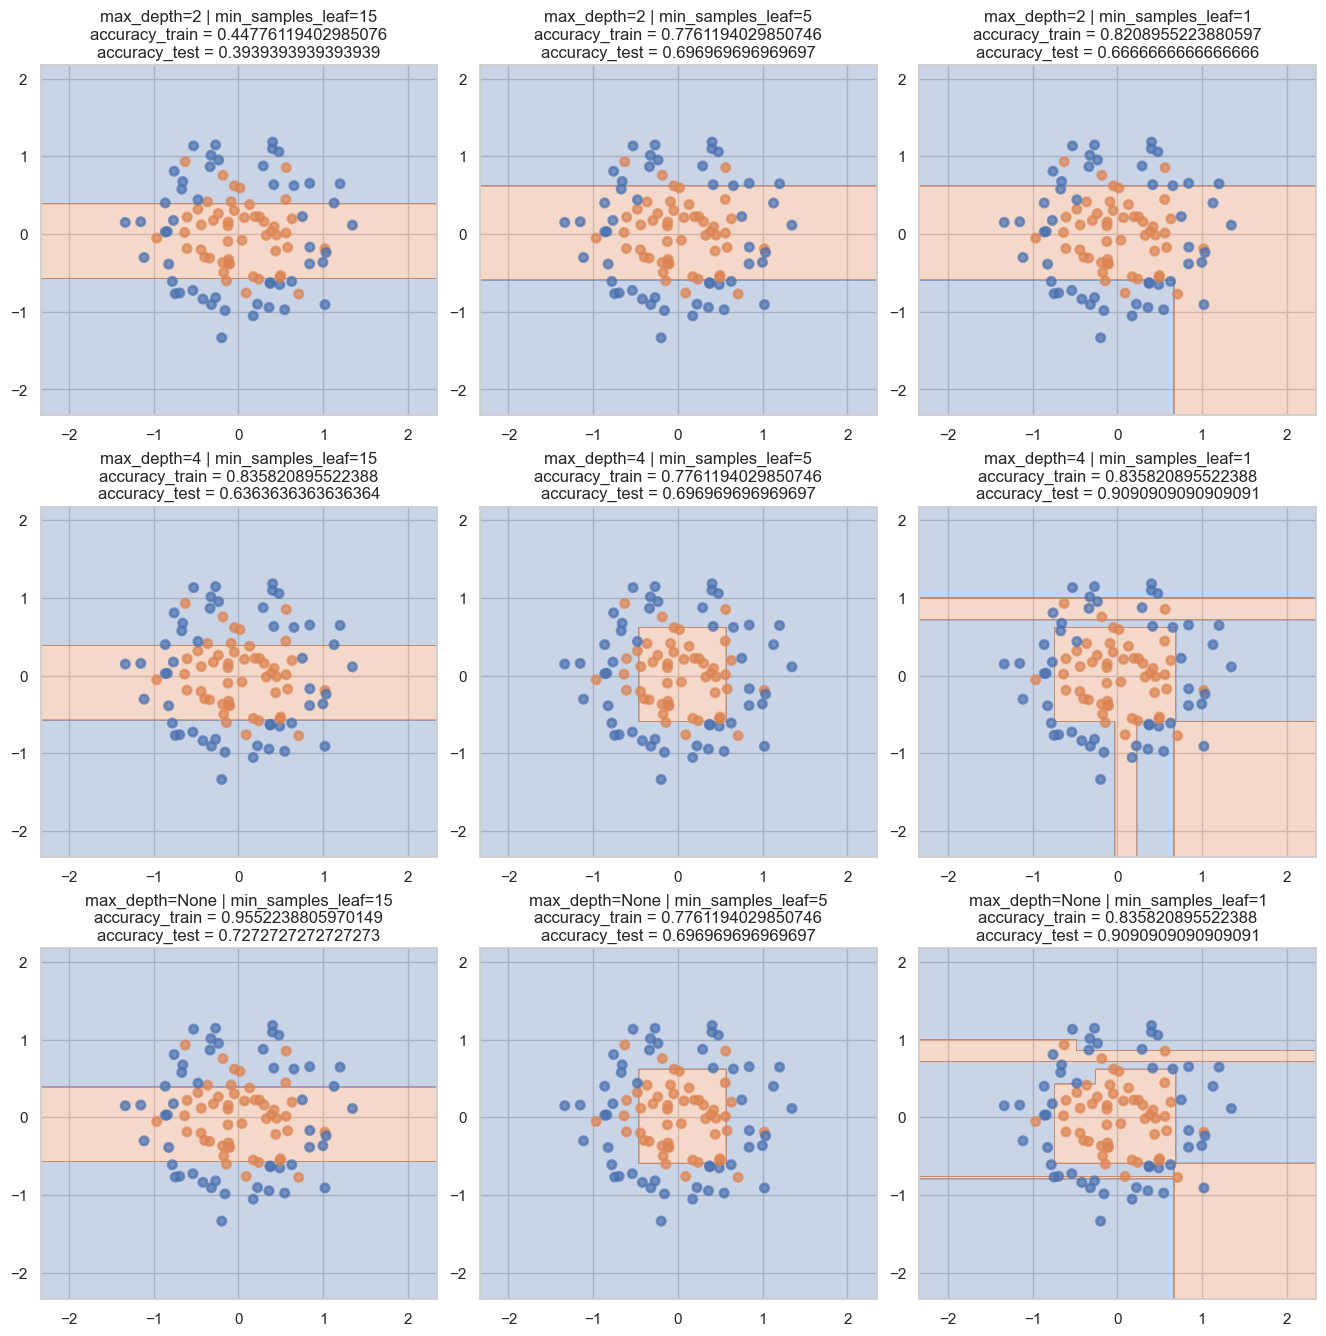

Model moons:


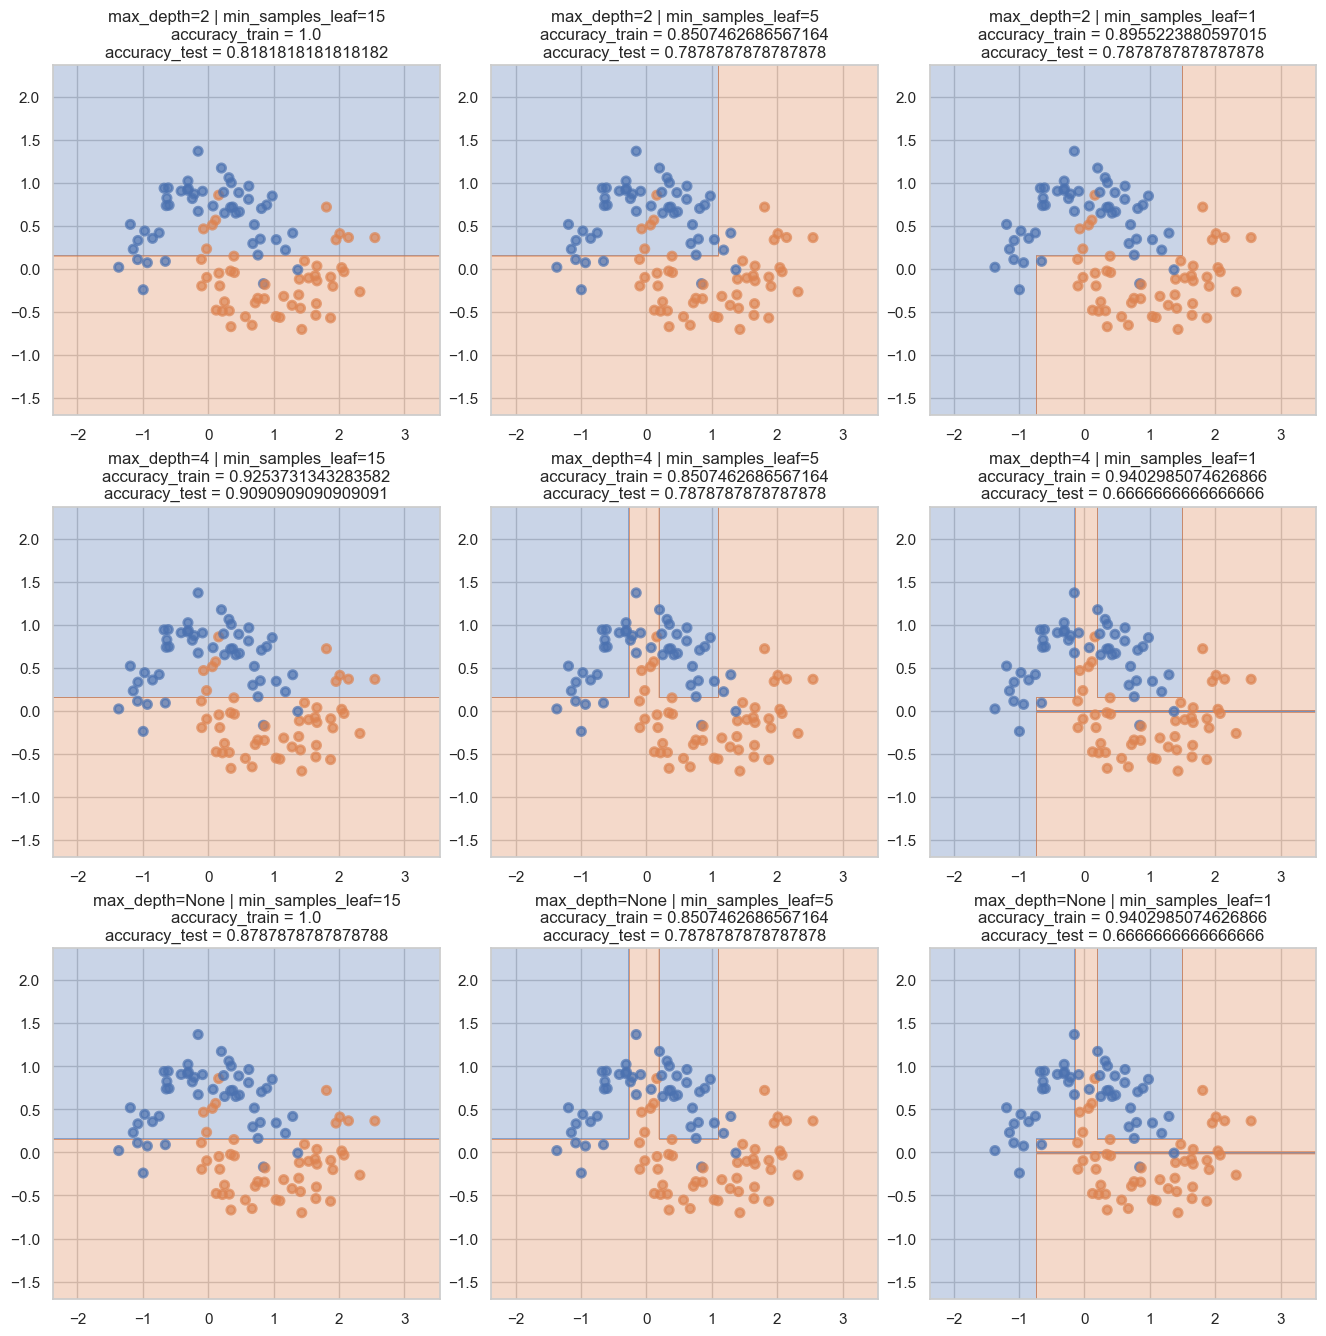

Model classification:


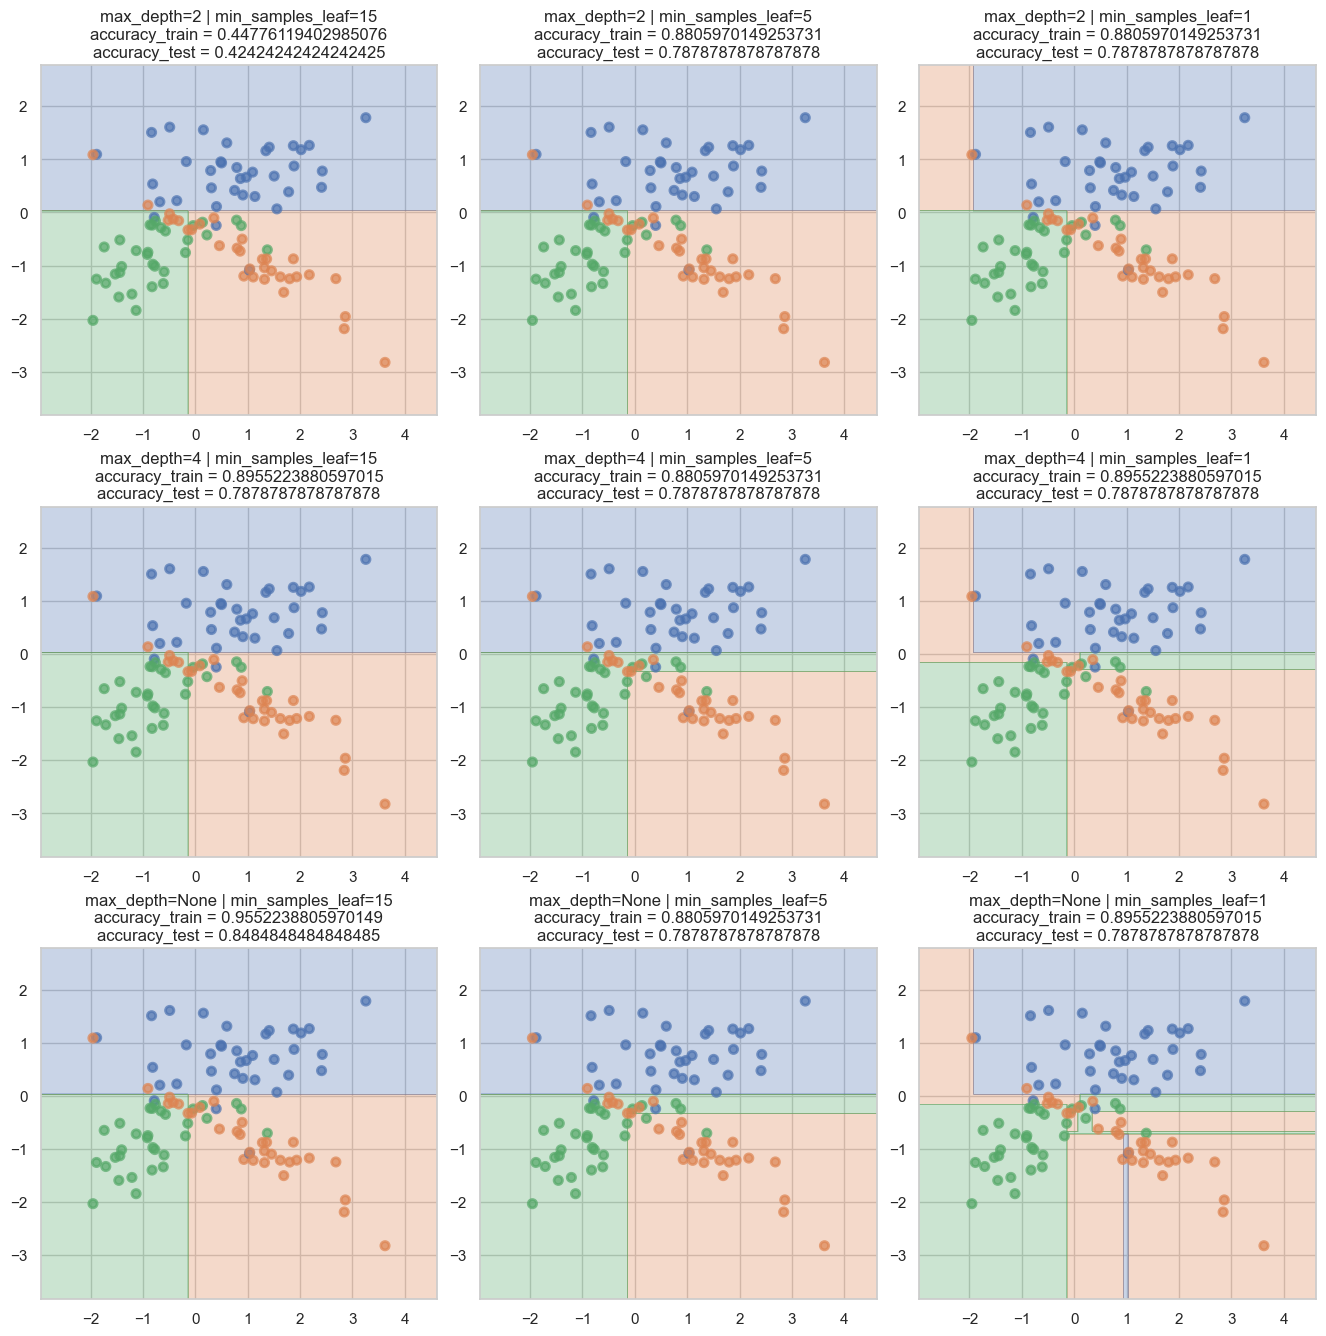

In [8]:
for k, (X, y) in enumerate(datasets):
    print(f'Model {model_names[k]}:')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    plt.figure(figsize=(14, 14))
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            plt.subplot2grid((3, 3), (i, j))
            plot_surface(clf, X, y)
            title = 'max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf)
            plt.title(title + f'\naccuracy_train = {accuracy_score(y_train, train_pred)}' + \
                     f'\naccuracy_test = {accuracy_score(y_test, test_pred)}')
            
            test_pred = clf.predict(X_test)
            train_pred = clf.predict(X_train)
    plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_surface(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

def create_interactive_plot(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    max_depth_values = [2, 4, 6, 8, 10, None]
    min_samples_leaf_values = [1, 5, 10, 20]
    
    frames = []
    
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            
            xx, yy, Z = plot_surface(clf, X, y)
            
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            
            accuracy_train = np.round((train_pred == y_train).mean(), 3)
            accuracy_test = np.round((test_pred == y_test).mean(), 3)
            
            frame = go.Frame(
                data=[
                    go.Contour(
                        x=xx[0], y=yy[:, 0], z=Z,
                        colorscale='RdBu', 
                        showscale=False,
                        opacity=0.5
                    ),
                    go.Scatter(x=X_train[:, 0], y=X_train[:, 1], mode='markers',
                               marker=dict(color=y_train, symbol='circle', colorscale='Jet', size=8), name='Train Points'),
                    go.Scatter(x=X_test[:, 0], y=X_test[:, 1], mode='markers',
                               marker=dict(color=y_test, symbol='x', colorscale='Jet', size=8), name='Test Points')
                ],
                name=f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}',
                layout=go.Layout(
                    title=f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}<br>Train Acc: {accuracy_train}, Test Acc: {accuracy_test}'
                )
            )
            frames.append(frame)
    
    initial_frame = frames[0].data
    
    sliders = [
        dict(
            active=0,
            currentvalue={"prefix": "max_depth: "},
            pad={"t": 50},
            steps=[
                dict(
                    method="animate",
                    args=[[f'max_depth={depth}, min_samples_leaf={leaf}'],
                          {"mode": "immediate", "frame": {"duration": 500, "redraw": True}, "transition": {"duration": 300}}],
                    label=f'max_depth={depth}, min_samples_leaf={leaf}'
                ) for depth in max_depth_values for leaf in min_samples_leaf_values
            ]
        )
    ]
    
    fig = go.Figure(
        data=initial_frame,
        frames=frames,
        layout=go.Layout(
            title="Decision Tree Classifier Interactive Visualization",
            xaxis=dict(title='Feature 1', range=[X[:, 0].min() - 1, X[:, 0].max() + 1]),
            yaxis=dict(title='Feature 2', range=[X[:, 1].min() - 1, X[:, 1].max() + 1]),
            updatemenus=[
                dict(
                    type="buttons",
                    showactive=False,
                    buttons=[
                        dict(label="Play",
                             method="animate",
                             args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "mode": "immediate"}]),
                        dict(label="Pause",
                             method="animate",
                             args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
                    ]
                )
            ],
            sliders=sliders
        )
    )
    
    fig.show()

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
create_interactive_plot(X, y)

__Ответ:__ 

1. Можно заметить что при уменьшении числа объектов в листе модель переобучается и старается сильнее подстроиться под данные. Также (в случае фиксированного параметра min_samples_leaf) модели стараются больше подстроиться под обучающую выборку, однако при изменении максимальной глубины с 2х до 4х качество во многих случаях становится лучше. При отсутствии ограничения на максимальную глубину изображение разделяющей плоскости немного меняется (и усложняется), однако это незначительно сказывается на accuracy.

2. Наилучшие результаты разные для разных выборок, так как в каждой выборке разная степень перемешанностии данных, из-за чего требуется разная обобщающая способность для лостижения наилучших результатов

Например, для первого датасета наилучшие результаты достигаются в случае глубины 4 и 1 объекта в листе (можно заметить, что резульатат с глубуной 4 и без ограничения глубины одинаковые => наилучшая глубина дерева = 4 при min_samples_leaf=1). В примере с датасетом moons лучший результат при max_depth = 4 и min_samples_leaf=15. Для данного датасета уменьшение числа оъектво в листе ведет к переобучению.
Для модели классификации – последнего датасета – наилучшая разделяющая посерхность строиться при отстутствии ограничения на максимальную глубину дерева и при достаточно большом минимальном числе объектов в листе. При уменьшении числа объектов в листе модель переобучается, а также при появлении ограничений на глубину модель пытается сильнее подстроиться под обучающую выборку.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

**Посылка: https://contest.yandex.ru/contest/72492/run-report/129776663/**

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
%load_ext autoreload

%autoreload 2

from hw5code import find_best_split

df = pd.read_csv('https://github.com/esokolov/ml-course-hse/raw/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv')

In [10]:
y = df['UNS']
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


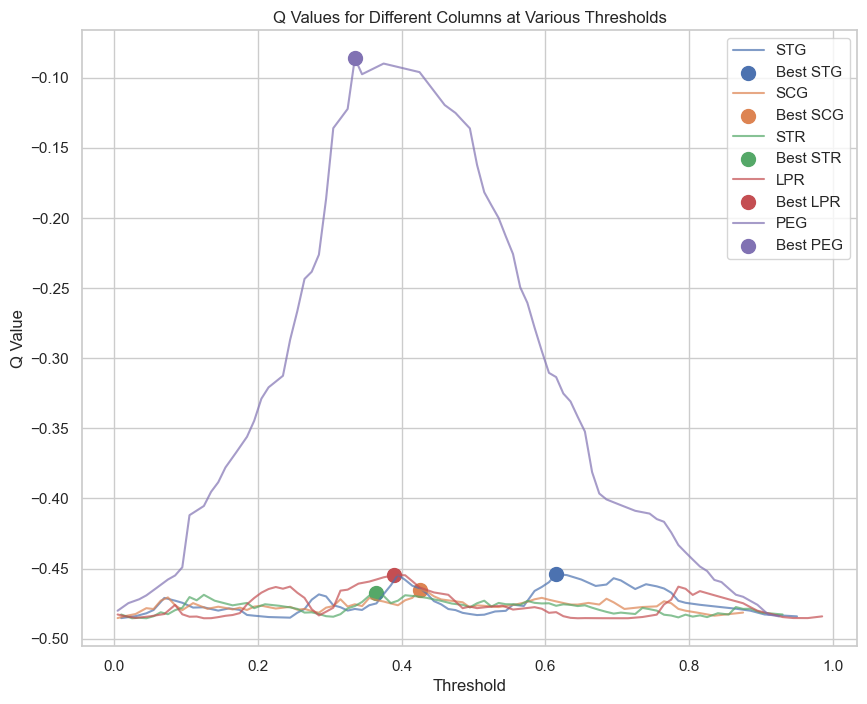

In [11]:
col_names = df.iloc[:, :-1].columns
plt.figure(figsize=(10, 8))
colors_bright = ['red, blue', 'green', 'purple', 'black']
for i in range(5):
    col = col_names[i]
    thresholds, Q, best_th, bst_gin = find_best_split(np.array(df[col]), np.array(y))
    plt.plot(thresholds, Q,  label=col, alpha=0.7)
    plt.scatter(best_th, bst_gin, marker='o', s=100, label=f'Best {col}')
    
plt.xlabel('Threshold')
plt.ylabel('Q Value')
plt.title('Q Values for Different Columns at Various Thresholds')
plt.legend()

plt.grid(True)
plt.show()

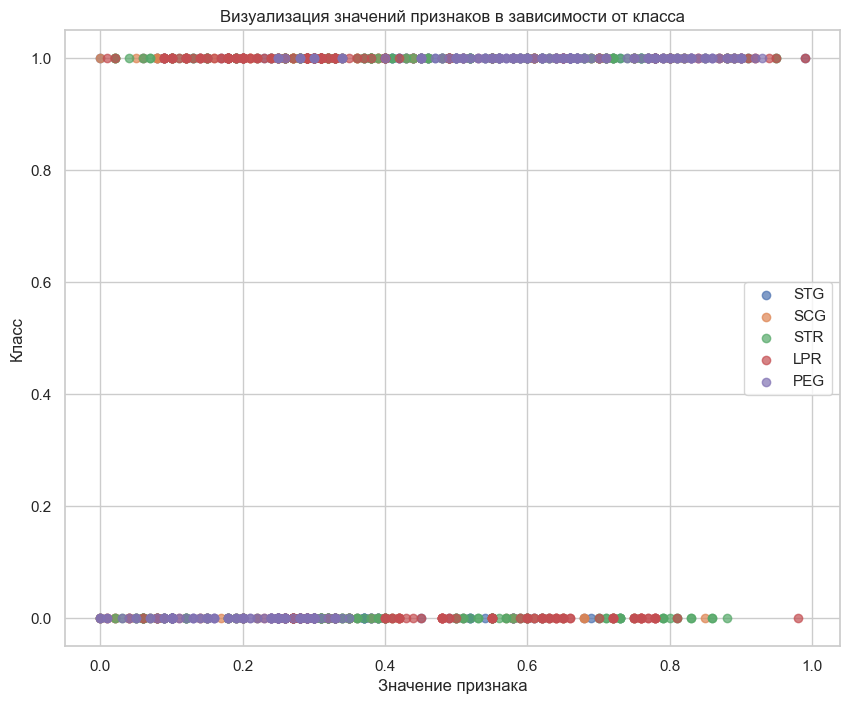

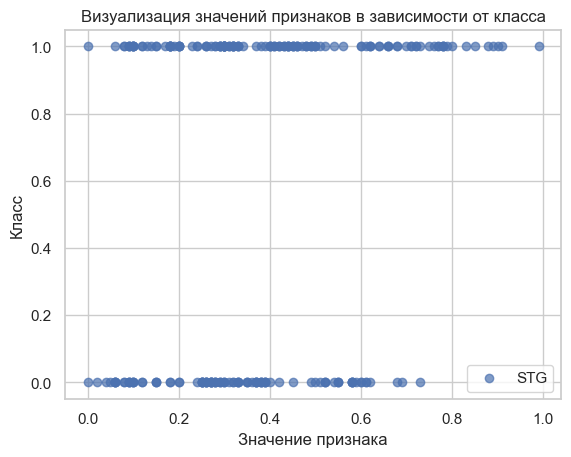

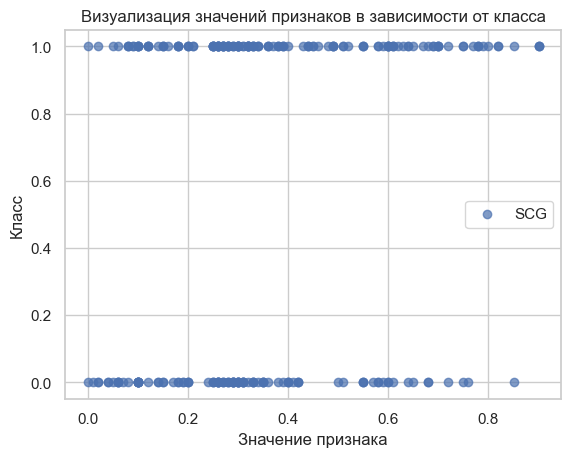

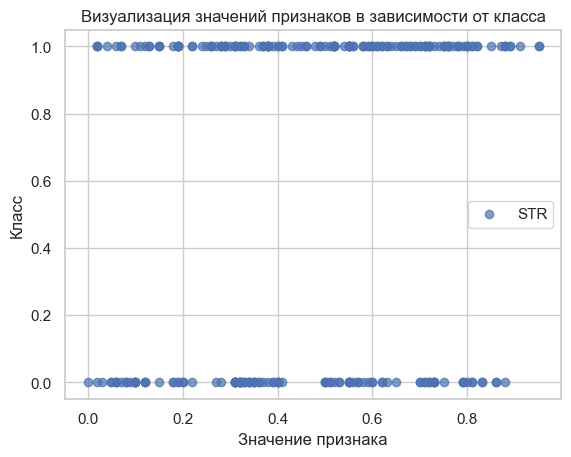

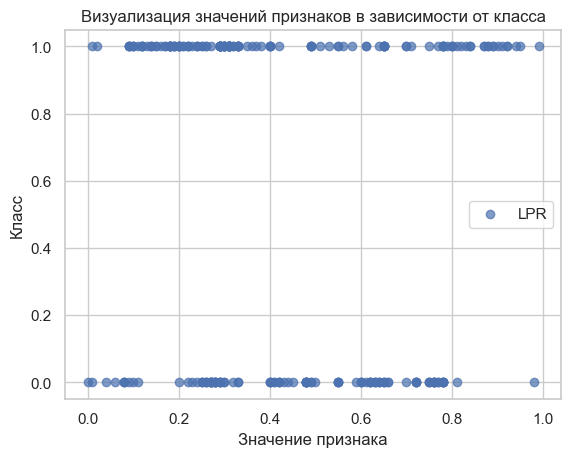

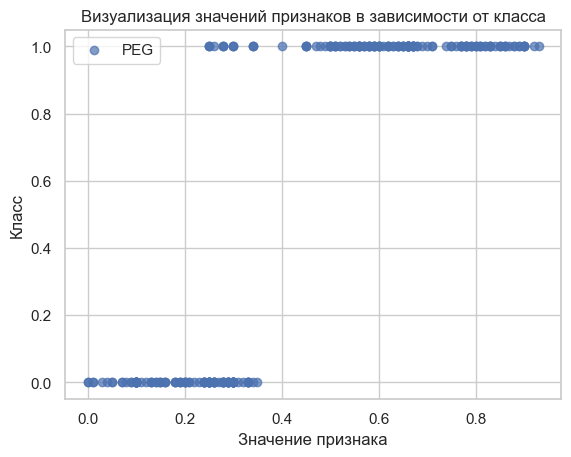

In [12]:
col_names = df.iloc[:, :-1].columns
plt.figure(figsize=(10, 8))
colors_bright = ['red, blue', 'green', 'purple', 'black']
for i in range(5):
    col = col_names[i]
    plt.scatter(df[col], y,  label=col, alpha=0.7)    
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('Визуализация значений признаков в зависимости от класса')
plt.legend()

plt.grid(True)
plt.show()
for i in range(5):
    col = col_names[i]
    plt.scatter(df[col], y,  label=col, alpha=0.7)    
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.title('Визуализация значений признаков в зависимости от класса')
    plt.legend()

    plt.grid(True)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 

Исходя из кривых значениый критерия Джини деление выборки на два поддерева надо по признаку PEG, что согласуется с визуальной оценкой scatter графиков.
 
Для хороших выборов значение критерия джини похоже на параболу ветвями вниз (при отсортированных порогах), а классы достаточно четко величины в зависимости от какого-то порогового значения.
для признаков, по которым деление практически невозможно, значения индекса Джини колеблется вокруг определенной (маленькой) величины и практически не изменяется.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
 **Посылка: https://contest.yandex.ru/contest/72492/run-report/129776683/**

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
data = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_upd = data.apply(lambda x: le.fit_transform(x))
data_upd

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [15]:
from hw5code import DecisionTree

# 1 – p, 0 – e
X, y = data_upd.iloc[:, 1:].to_numpy(), data_upd[0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical']*X.shape[-1]
dt = DecisionTree(feature_types=feature_types)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [16]:
ttt_df = pd.read_csv('https://github.com/esokolov/ml-course-hse/raw/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv')

ttt_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [17]:
from sklearn.preprocessing import OneHotEncoder

ttt_df = ttt_df.apply(lambda x: LabelEncoder().fit_transform(x))
X = ttt_df.iloc[:, :-1].to_numpy()
y = ttt_df.iloc[:, -1].to_numpy()

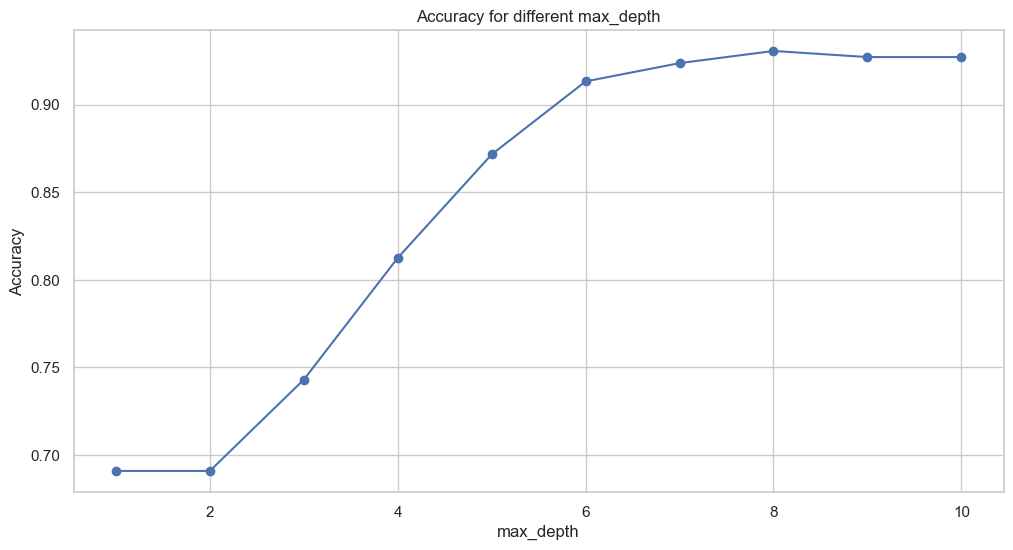

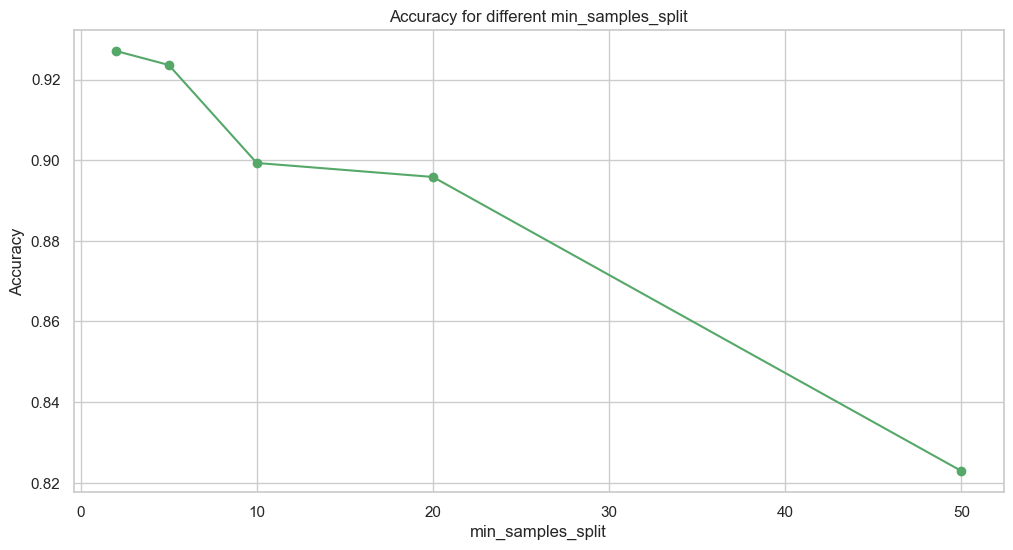

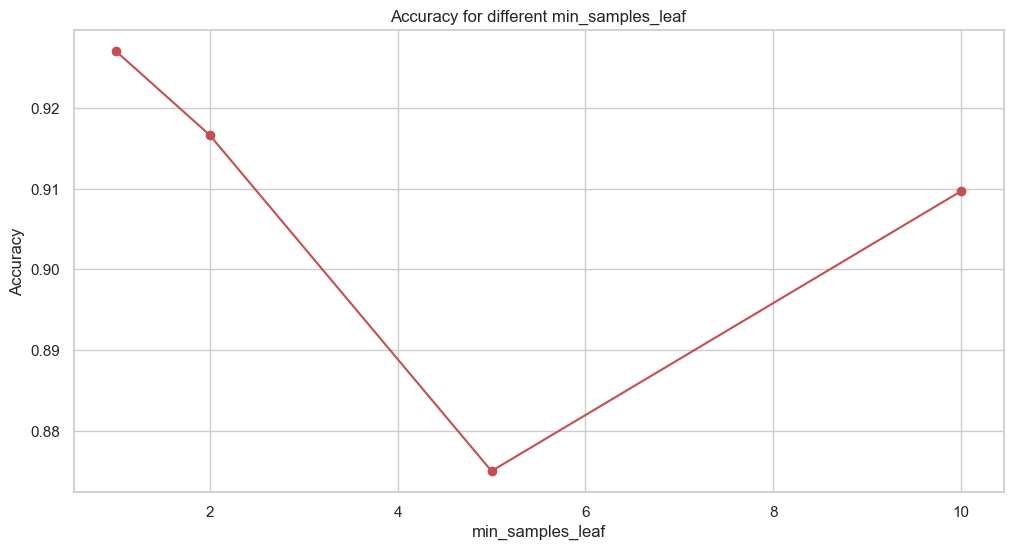

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies_max_depth = []
accuracies_min_samples_split = []
accuracies_min_samples_leaf = []

max_depth_values = range(1, 11)
min_samples_split_values = [2, 5, 10, 20, 50]
min_samples_leaf_values = [1, 2, 5, 10]

for max_depth in max_depth_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_max_depth.append(accuracy)

for min_samples_split in min_samples_split_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_split=min_samples_split)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_min_samples_split.append(accuracy)

for min_samples_leaf in min_samples_leaf_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_min_samples_leaf.append(accuracy)

plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, accuracies_max_depth, marker='o', color='b')
plt.title('Accuracy for different max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split_values, accuracies_min_samples_split, marker='o', color='g')
plt.title('Accuracy for different min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(min_samples_leaf_values, accuracies_min_samples_leaf, marker='o', color='r')
plt.title('Accuracy for different min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [19]:
from hw5code import LinearRegressionTree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
param_grid_lrt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_lrt = GridSearchCV(LinearRegressionTree(), param_grid_lrt, 
                        scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_lrt.fit(X_train, y_train)

best_lrt = grid_lrt.best_estimator_

y_pred_lrt = best_lrt.predict(X_test)

rmse_lrt = np.sqrt(mean_squared_error(y_test, y_pred_lrt))
r2_lrt = np.sqrt(r2_score(y_test, y_pred_lrt))

print(f"RMSE для LinearRegressionTree: {rmse_lrt}")
print(f"R2 для LinearRegressionTree: {r2_lrt}")

RMSE для LinearRegressionTree: 0.5815335878032752
R2 для LinearRegressionTree: 0.8615949861456124


In [21]:
param_grid_dtr = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dtr, 
                        scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_dtr.fit(X_train, y_train)

best_dtr = grid_dtr.best_estimator_
y_pred_dtr = best_dtr.predict(X_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = np.sqrt(r2_score(y_test, y_pred_dtr))

print(f"RMSE для DecisionTreeRegressor: {rmse_dtr}")
print(f"R2 для DecisionTreeRegressor: {r2_dtr}")

RMSE для DecisionTreeRegressor: 0.6738339616489634
R2 для DecisionTreeRegressor: 0.8087434895164073


RMSE ниже у моего, а R2 выше. То есть, мое дерево работает лучше, чем DecisionTreeRegressor

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

R2 для DecisionTreeRegressor: 0.9773654144065239


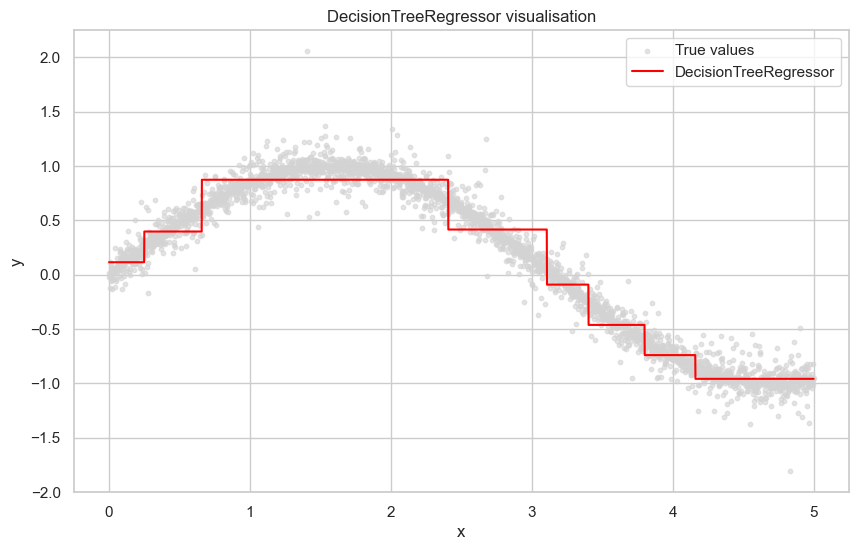

In [22]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(x_train, y_train)
y_pred_tree = reg_tree.predict(x)
r2_reg_tree = np.sqrt(r2_score(y, y_pred_tree))
print(f"R2 для DecisionTreeRegressor: {r2_reg_tree}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='lightgray', s=10, label='True values', alpha=0.6)
plt.plot(x, y_pred_tree, color='red', label='DecisionTreeRegressor')
plt.title('DecisionTreeRegressor visualisation')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

R2 для LinearRegressionTree: 0.9801931743560249


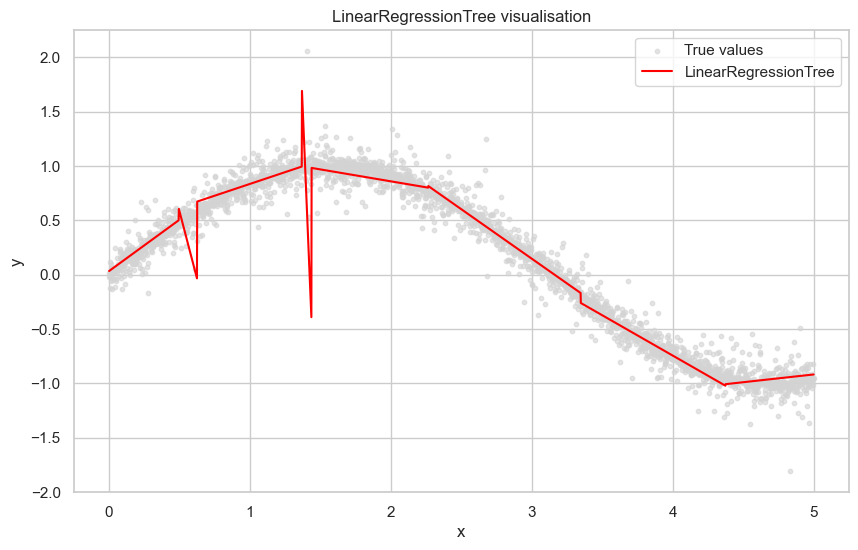

In [23]:
n_samples = 3_000

lin_tree = LinearRegressionTree(max_depth=3)
lin_tree.fit(x_train, y_train)
y_pred_lin_tree = lin_tree.predict(x)
r2_lin_tree = np.sqrt(r2_score(y, y_pred_lin_tree))
print(f"R2 для LinearRegressionTree: {r2_lin_tree}")


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='lightgray', s=10, label='True values', alpha=0.6)
plt.plot(x, y_pred_lin_tree, color='red', label='LinearRegressionTree')
plt.title('LinearRegressionTree visualisation')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Ответ:**

Достоинство моего дерева - то, что оно может строить неконстанстные прогнозы, а значит лучше прогнозировать в большинстве случаев (что видно на графике) и показывает, что R^2 больше у моего дерева

Недостаток - оно может переобучаться, что видно на некоторых участках со странными зигзагами/наклонами, противоположной "верному".

Вставьте что угодно, описывающее ваши впечатления от этого задания:

<a href="https://imgbb.com/"><img src="https://i.ibb.co/bQbCR3y/m1emlol-by-fstikbot-agadrxqaaqmhiug-Ag-ADrx-QAAq-Mh-IUg.gif" alt="m1emlol-by-fstikbot-agadrxqaaqmhiug-Ag-ADrx-QAAq-Mh-IUg" border="0"></a>

Ну а вообще прикольно, я ведь, получается, посадил дерево (даже 2!)

Осталось дом построить и сына вырастить ахахахха)